<img align="left" src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CC_BY.png"><br />

Created by Zhuo Chen for [Constellate](https://constellate.org) under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/).<br />
For questions/comments/improvements, email zhuo.chen@ithaka.org.<br />

# Data Visualization

This is lesson 3 of 3 in the educational series on **Data Visualization**. 

**Description:** This notebook discusses:

* Plot several subplots in a single figure
* Create histograms 
* Create an interactive figure

**Use case:** For Learners (Detailed explanation, not ideal for researchers)

**Difficulty:** Intermediate

**Completion time:** 90 minutes

**Knowledge Required:** 

* Python basics ([start learning Python basics](./python-basics-1.ipynb))
* Pandas ([start learning Pandas](./pandas_1.ipynb))

**Knowledge Recommended:**

Objects, attributes and methods (start learning [object-oriented programming](./python_intermediate_4.ipynb))

**Data Format**: .csv

**Libraries Used**: Pandas, Matplotlib

**Research Pipeline**: None

___

In [20]:
# set the backend to matplotlib notebook
%matplotlib notebook

# import pyplot module
import matplotlib.pyplot as plt

# import pandas
import pandas as pd

# Subplots

In [DataViz 1](./DataViz1.ipynb) and [DataViz 2](./DataViz2.ipynb), we only used a single axes object to plot a single graph or figure. However in real life, there are times when it is useful to show several plots in one figure so that the readers can compare.

Let's go get the childhood lead poisoning data for all 14 counties in MA. Suppose we would want to plot a figure that contains 14 line graphs, each for one of the 14 counties showing the lead poisoning data from 2012 - 2020. 

In [21]:
# download the sample file

from pathlib import Path
import urllib.request

# Check if a data folder exists. If not, create it.
data_folder = Path('./data/')
data_folder.mkdir(exist_ok=True)


# Get the url to the file and download the file
url='https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz3_ChildhoodLeadPoisoning_County20122020.csv'
urllib.request.urlretrieve(url, './data/lead_poisoning_county_2012To2020.csv')

# Success message
print('Sample file ready.')

Sample file ready.


Next, we create a dataframe from the csv file. 

In [22]:
# Create a dataframe from the csv file
lead = pd.read_csv('./data/lead_poisoning_county_2012To2020.csv')
lead

,Geo Description,Year,BLL Category,Sex,Case Count,Lead Screening Count,Rate,95% Confidence Interval,State BLL Case Count,State Lead Screening Count,...,Stability,Average(BLL Case Count),Average(Lead Screening Count),Total(Rate),95 percent Total(Confidence Interval),State Average BLL Cases Count,State Average Screening Count,State Rate,Statistical Significance for Annual Average,Unnamed: 22
0,Barnstable,2012,Estimated Confirmed  5 g/dL (elevated),Female,18,1880,9.6,5.1 - 13.9,1988,85685,...,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Barnstable,2012,Estimated Confirmed  5 g/dL (elevated),Male,26,2073,12.5,7.7 - 17.3,2454,89764,...,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barnstable,2012,Estimated Confirmed  5 g/dL (elevated),Total,44,3953,11.1,7.8 - 14.4,4442,175449,...,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Barnstable,2013,Estimated Confirmed  5 g/dL (elevated),Female,17,1916,8.9,4.6 - 13.0,1693,87168,...,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Barnstable,2013,Estimated Confirmed  5 g/dL (elevated),Male,22,2022,10.9,6.3 - 15.4,2079,91383,...,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Worcester,2019,Estimated Confirmed  5 g/dL (elevated),Male,165,10141,16.3,13.7 - 18.7,1162,87743,...,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,Worcester,2019,Estimated Confirmed  5 g/dL (elevated),Total,284,19798,14.3,12.6 - 16.0,2103,172214,...,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,Worcester,2020,Estimated Confirmed  5 g/dL (elevated),Female,99,8508,11.6,9.3 - 13.9,893,73476,...,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376,Worcester,2020,Estimated Confirmed  5 g/dL (elevated),Male,140,9025,15.5,12.9 - 18.0,1102,76434,...,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The only columns that are of interest to us are the column containing county names, the column containing years and the column containing the rate of children per 1,000 who had elevated blood lead level. Let's reduce the dataframe to the three columns. Moreover, since we are not interested in the data broken down by the sex of the children, the only rows that we will maintain are the rows where the column `Sex` says `Total`.

In [23]:
# Reduce the dataframe to the data of interest
lead_perc = lead.loc[lead['Sex']=='Total', ['Geo Description', 'Year', 'Rate']].copy().reset_index(drop=True)

# Change the rate column to percentage
lead_perc['Rate'] = lead_perc['Rate'] * 0.1

# Rename the columns to make them more descriptive
lead_perc = lead_perc.rename(columns={'Geo Description':'County', 'Rate':'Percentage'})

We are ready to plot the figure! 

<IPython.core.display.Javascript object>


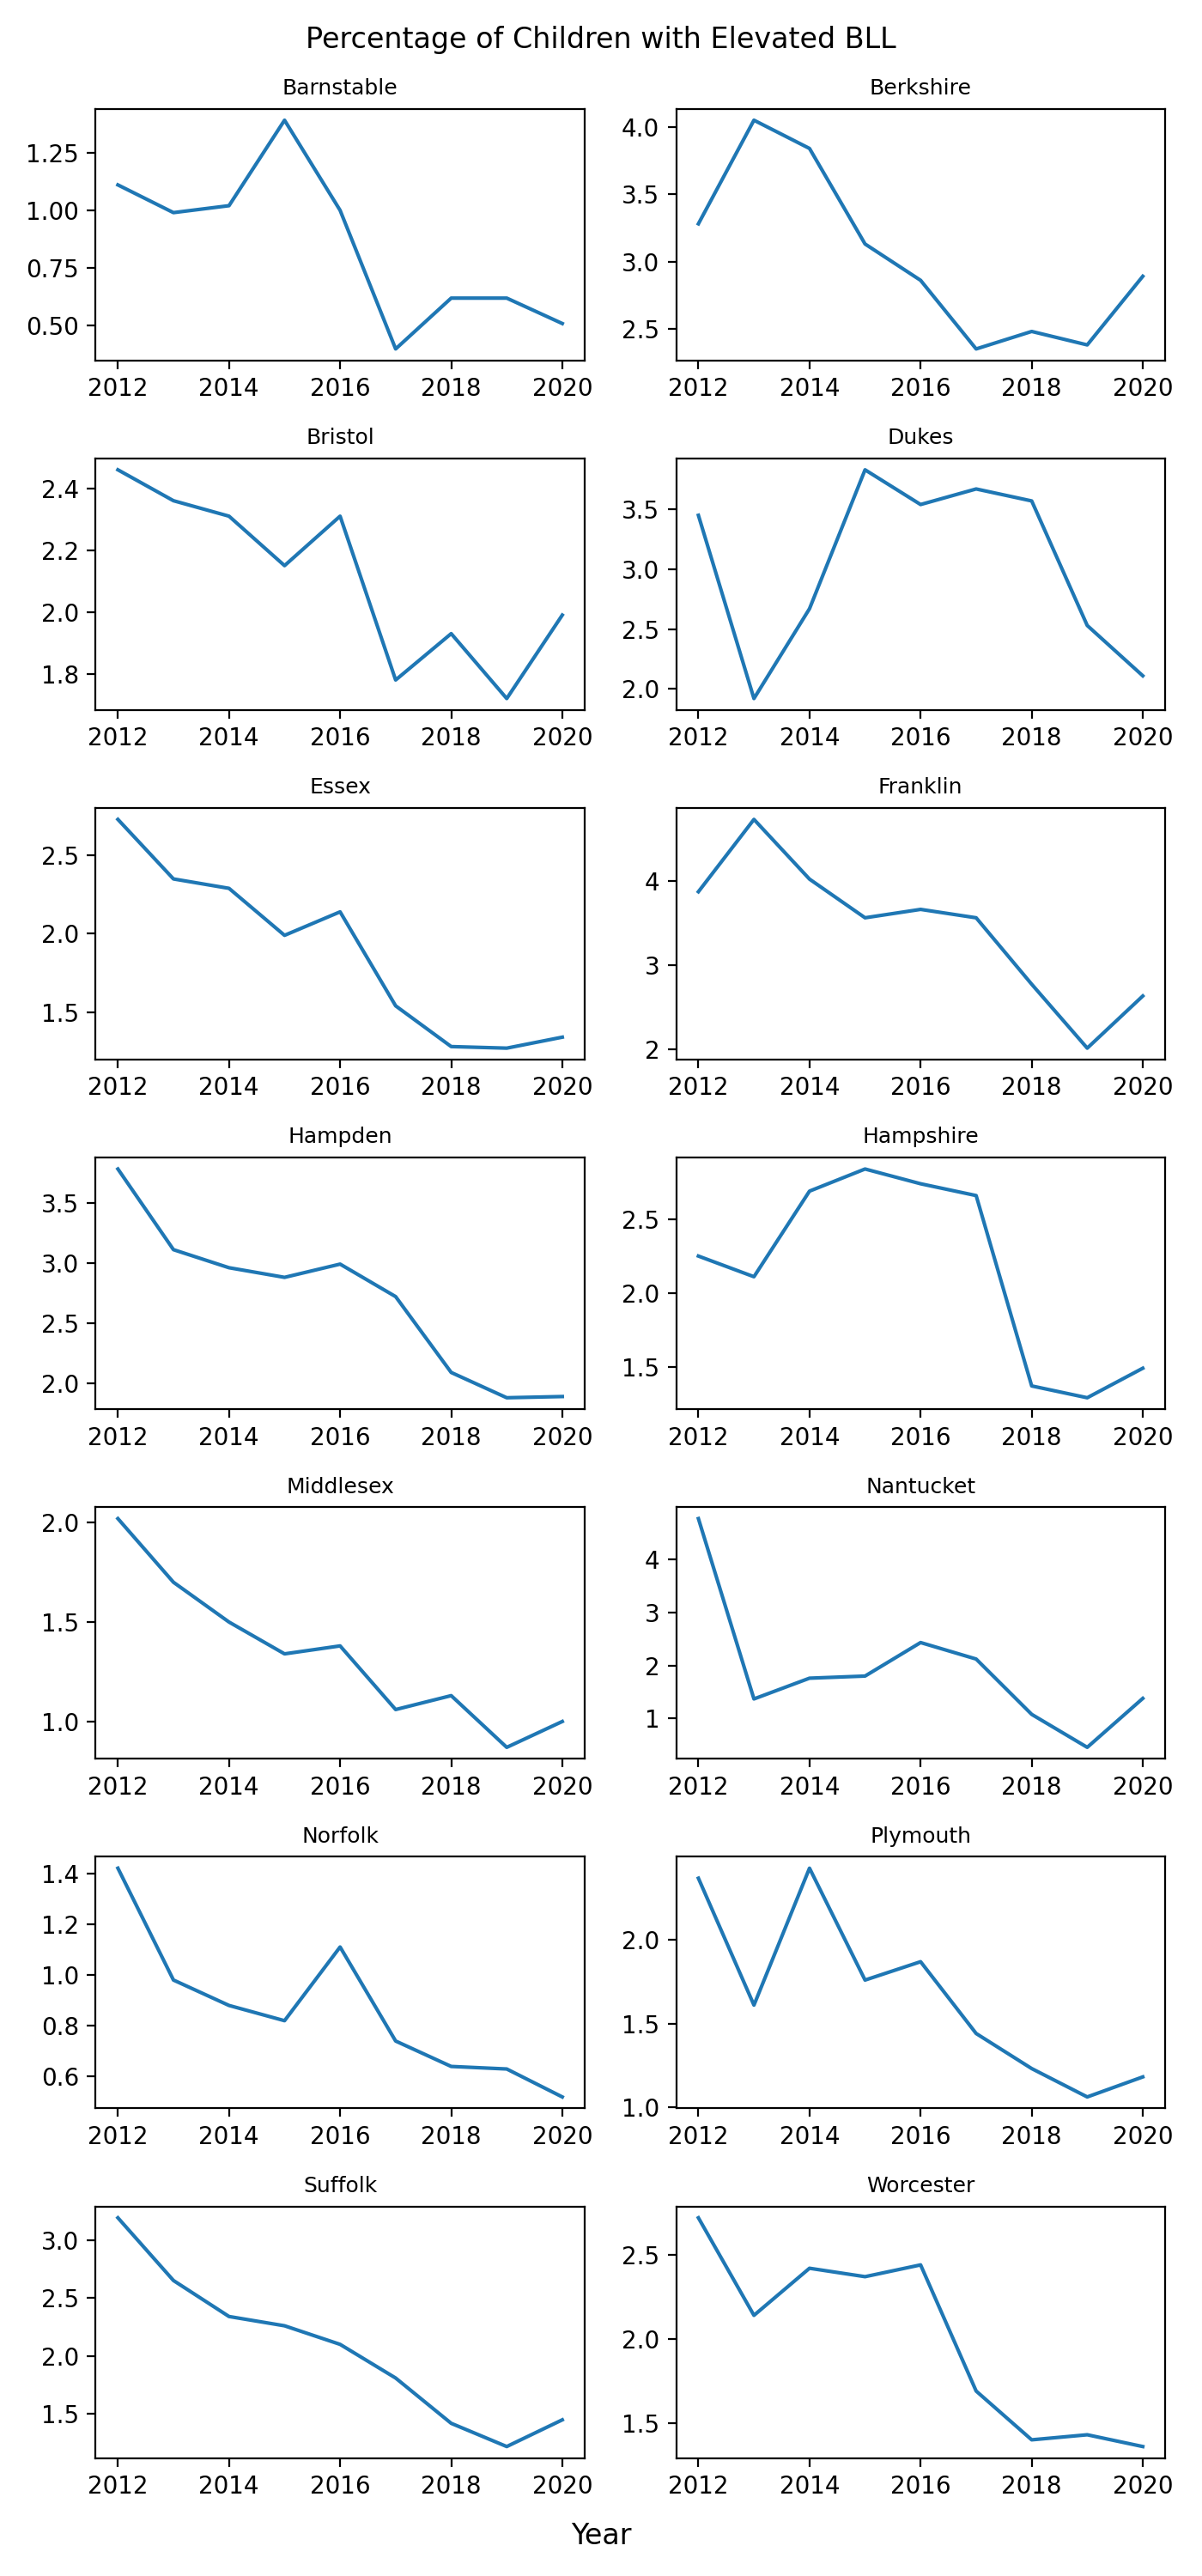

In [24]:
# create a figure with 7 rows and 2 columns
fig, axs = plt.subplots(nrows=7, ncols=2, figsize = (7, 15))
fig.subplots_adjust(top=0.8) # Adjust positon 

for county, ax in zip(lead_perc['County'].unique(), axs.flat):
    ax.plot(range(2012, 2021), lead_perc.loc[lead_perc['County']==county, 'Percentage'])
    ax.set_title(county, fontsize=9)
fig.suptitle('Percentage of Children with Elevated BLL', y=0.99)
fig.supxlabel('Year')
fig.tight_layout()


<h2 style="color:red; display:inline">Coding Challenge! &lt; / &gt; </h2>

You may have noticed that all the subplots share the same x-axis. We have learned in [DataViz 1](./DataViz1.ipynb) that a good data visualization will avoid unnecessary chartjunks. Therefore, we could simplify the figure by making all the subplots share the x-axis so that we don't need to repeat the same x-axis for each and every subplot! 

There is a parameter `sharex` in the `subplots()` method that we can use to achieve this goal! 

<IPython.core.display.Javascript object>


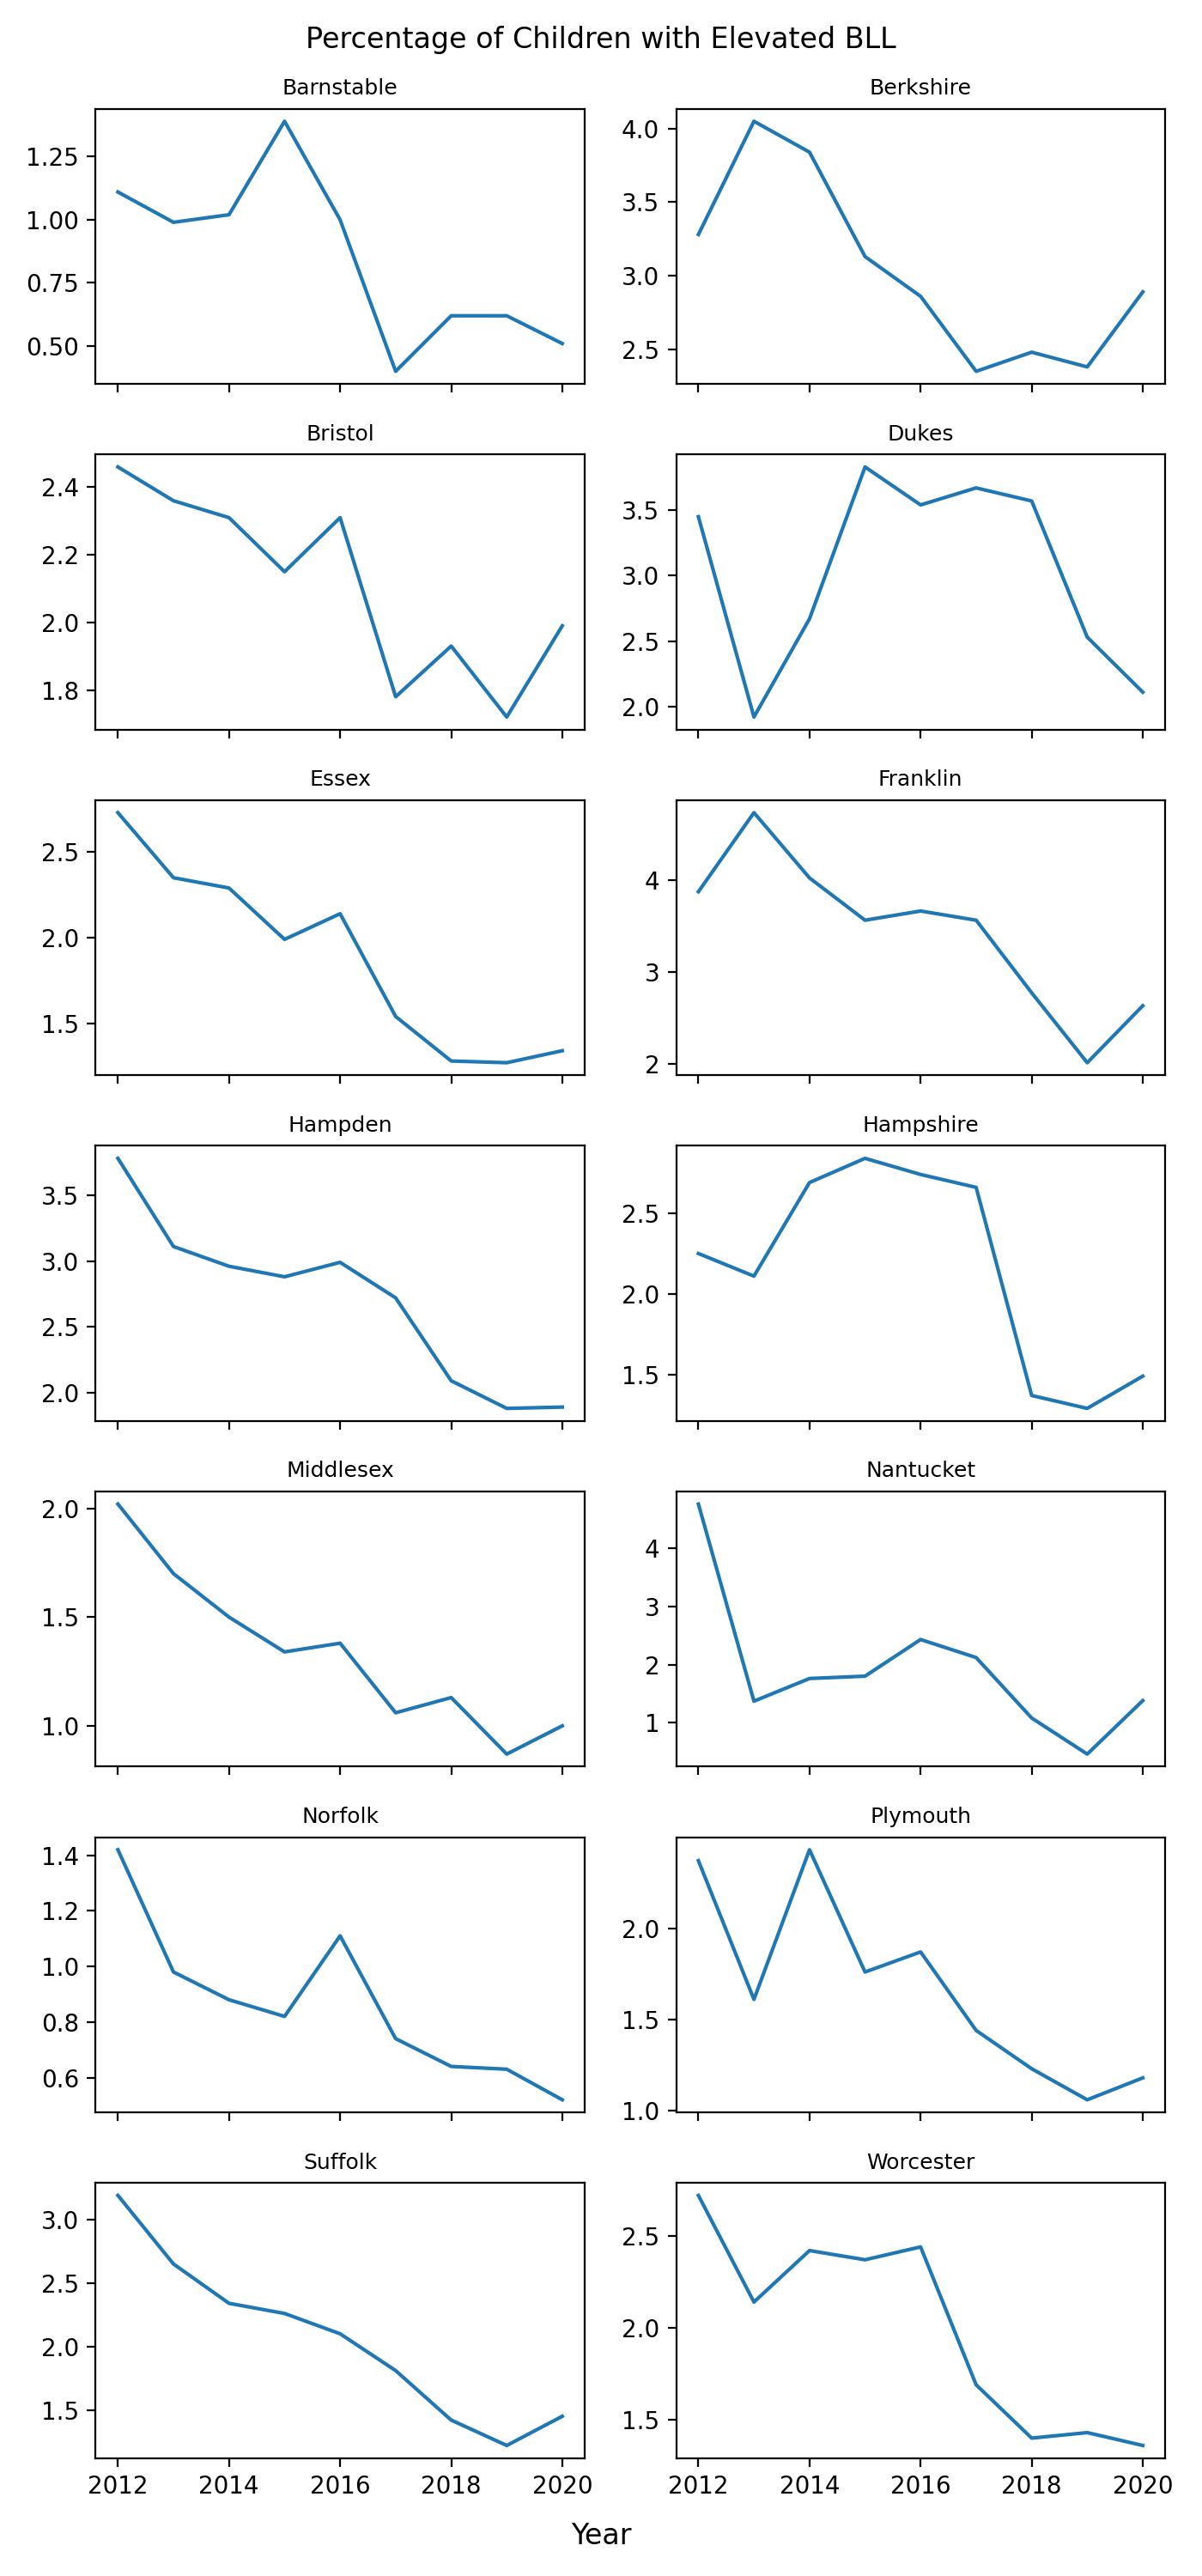

In [25]:
# create a figure with 7 rows and 2 columns
fig, axs = plt.subplots(nrows=7, ncols=2, figsize = (7, 15), sharex=True)
fig.subplots_adjust(top=0.8) # Adjust positon 

# Get the counties
counties = lead_perc['County'].unique().tolist()

# Make the subplots
for i, ax in enumerate(axs.flat):
    ax.plot(range(2012, 2021), lead_perc.loc[lead_perc['County']==counties[i], 'Percentage'])
    ax.set_title(counties[i], fontsize=9)
fig.suptitle('Percentage of Children with Elevated BLL', y=0.99)
fig.supxlabel('Year')
fig.tight_layout()

We see that the range of numbers on the y-axis is different for each subplot in the figure. To make the comparison between counties easier for the readers, we would want to set the same y axis range for all subplots. Can you search on the internet to find out how we can achieve this? In the next code cell, write some code to make y axis range the same for all the subplots!

In [26]:
### Adjust the y axis range 


# Histograms

A histogram is a bar chart which shows the frequency of observations. In a histagram, the x-axis is a continuous quantitative value. The height of each bar shows the frequency of a certain range of values. The biggest difference between a bar chart and a histagram is that a bar chart has categorical values on the x-axis but a histagram has continuous quantitative values on the x-axis. 

We will use the data on the [2022 Boston Marathon](http://registration.baa.org/2022/cf/Media/iframe_ResultsSearch.cfm?mode=download&display=yes) to plot a histagram. 

In [27]:
# Get the url to the file and download the file
url='https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz3_BostonMarathon2022.csv'
urllib.request.urlretrieve(url, './data/BostonMarathon.csv')

# Create a dataframe from the csv file
run = pd.read_csv('./data/BostonMarathon.csv')
run

,BibNumber,FullName,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,Zip,CountryOfResAbbrev,CountryOfResName,CountryOfCtzAbbrev,CountryOfCtzName,OfficialTime,RankOverall,RankOverGender,RankOverDivision,EventGroup,SubGroupLabel,SubGroup
0,4,Evans Chebet,"Chebet, Evans",33,M,Kapsabet,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2:06:51,1,1,1,Runners,NaN,NaN
1,5,Lawrence Cherono,"Cherono, Lawrence",33,M,Eldoret,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2:07:21,2,2,2,Runners,NaN,NaN
2,1,Benson Kipruto,"Kipruto, Benson",31,M,Kapsabet,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2:07:27,3,3,3,Runners,NaN,NaN
3,9,Gabriel Geay,"Geay, Gabriel",25,M,Tampa,FL,Florida,33647,USA,United States of America,TAN,Tanzania,2:07:53,4,4,4,Runners,NaN,NaN
4,11,Eric Kiptanui,"Kiptanui, Eric",31,M,NaN,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2:08:47,5,5,5,Runners,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24829,7681,Paul Kent,"Kent, Paul",58,M,Hingham,MA,Massachusetts,2043,USA,United States of America,USA,United States of America,6:56:35,24830,14258,1451,Runners,Para T61-T62,Para T61-T62
24830,7638,Aaron Burros,"Burros, Aaron",51,M,Houston,TX,Texas,77024,USA,United States of America,USA,United States of America,6:58:12,24831,14259,1899,Runners,NaN,NaN
24831,28701,Julian Martin Arjona,"Martin Arjona, Julian",61,M,Loja,NaN,NaN,18300,ESP,Spain,ESP,Spain,6:58:50,24832,14260,1056,Runners,NaN,NaN
24832,5398,Jorge Valenciano,"Valenciano, Jorge",38,M,Guadalupe,NaN,NaN,67192,MEX,Mexico,MEX,Mexico,7:01:32,24833,14261,4818,Runners,NaN,NaN


There are 24834 rows in this dataframe. That means there were 24834 runners in the event last year! Suppose we are interested in the distribution of the age of the participants in ranges of 10. How many runners were of age 20 - 29 at the time of race? How many were of age 30 - 39? So on and so forth. 

In [28]:
# Reduce the dataframe to the column of interest
run_age = run[['AgeOnRaceDay']].copy()
run_age = run_age.rename(columns={'AgeOnRaceDay':'Age'})
run_age

,Age
0,33
1,33
2,31
3,25
4,31
...,...
24829,58
24830,51
24831,61
24832,38


In [29]:
# Get the max and min value of age to decide on bins
print(run_age['Age'].max())
print(run_age['Age'].min())

81
18


Can you take a guess which age group has the most runners? 20 - 30? 30 - 40? 

Let's find out the answer by plotting a histagram! 

<IPython.core.display.Javascript object>


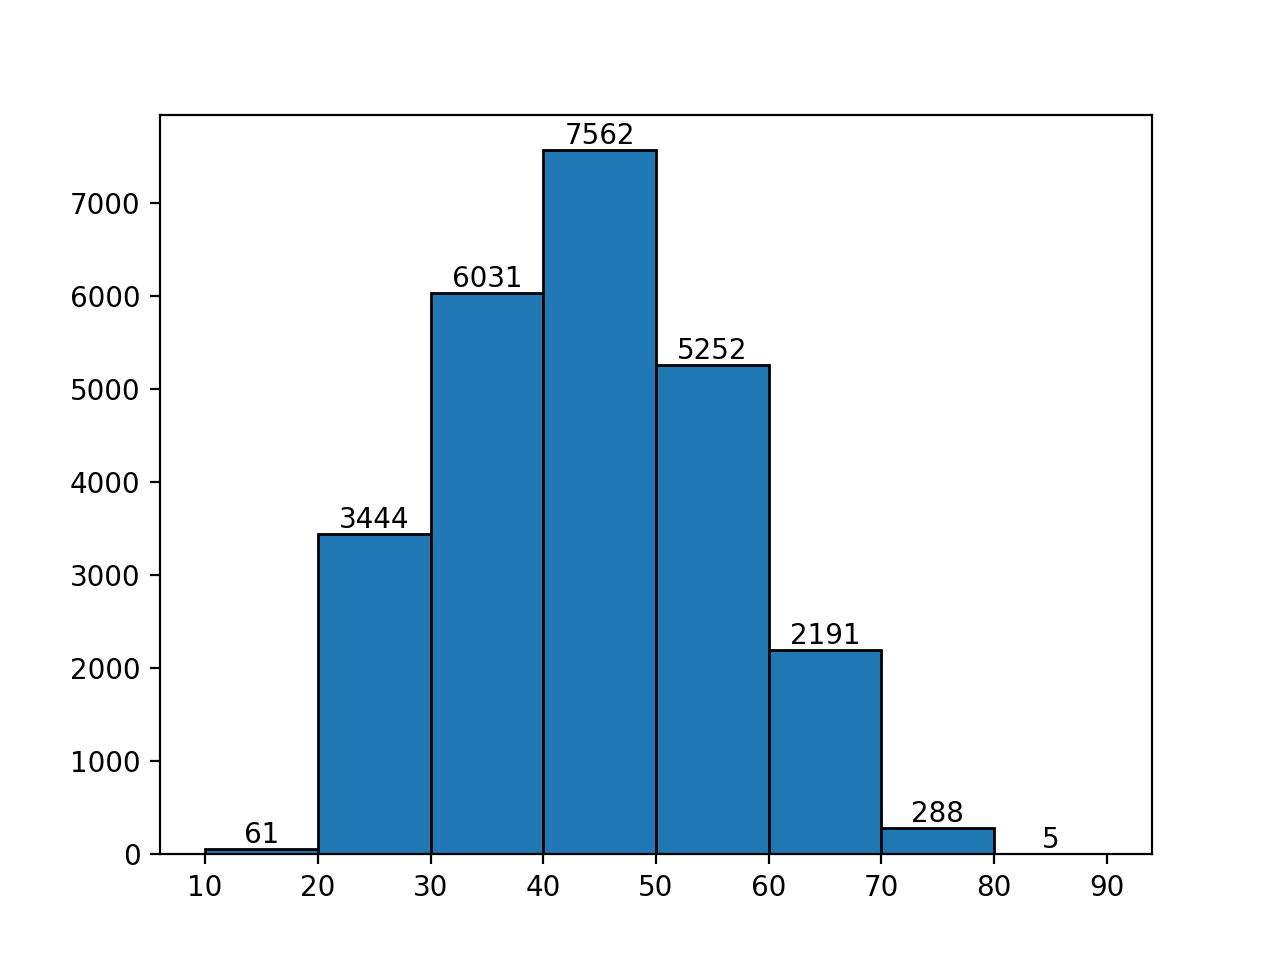

[Text(0, 0, '61'),
 Text(0, 0, '3444'),
 Text(0, 0, '6031'),
 Text(0, 0, '7562'),
 Text(0, 0, '5252'),
 Text(0, 0, '2191'),
 Text(0, 0, '288'),
 Text(0, 0, '5')]

In [30]:
# Make a list of bins
bins = range(10, 100, 10)

# Plot the histagram
fig, ax = plt.subplots()
counts, edges, bars = ax.hist(run_age['Age'], bins = bins, edgecolor='black')
ax.bar_label(bars)

<h2 style="color:red; display:inline">Coding Challenge! &lt; / &gt; </h2>

It's your turn! Can you plot a histagram displaying the distribution of runners in ranges of completion hours? That is, how many runners completed the race in 3 hours? How many in 4 hours? So on and so forth. Before you plot the histogram, take a guess how long it took the most runners to complete the race? Between 2 - 3 hours? Between 3 - 4 hours? Then make the plot! Did you guess it right?

# Create an interactive figure

Interactive charts can be really useful because they often tell a story more effectively. Moreover, they allow the audience to explore the information in a gradual and interactive way. Recall the interactive chart we played with in [DataViz 1](./DataViz1.ipynb) displaying the Ph.D. gender gap by country? When we look at all Ph.D. degrees regardless of the area of study, how well did we find the US does in terms of gender equity in awarding Ph.D. degrees? When we zoomed into "science and engineering", what did we find? When we zoomed into "social and behavioral", what did we find?    

The process of exploration is also a knowledge-building process. Interactive charts are really useful in helping the audience experience this process. 

In the next section, let's try building an interactive bar chart. 

## An interative bar chart

In [31]:
# import needed modules
from ipywidgets import widgets, interactive

In [32]:
# Get a general idea of the data
run.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24834 entries, 0 to 24833
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   BibNumber           24834 non-null  int64 
 1   FullName            24834 non-null  object
 2   SortName            24834 non-null  object
 3   AgeOnRaceDay        24834 non-null  int64 
 4   Gender              24834 non-null  object
 5   City                24820 non-null  object
 6   StateAbbrev         20127 non-null  object
 7   StateName           20127 non-null  object
 8   Zip                 24620 non-null  object
 9   CountryOfResAbbrev  24833 non-null  object
 10  CountryOfResName    24833 non-null  object
 11  CountryOfCtzAbbrev  24806 non-null  object
 12  CountryOfCtzName    24806 non-null  object
 13  OfficialTime        24834 non-null  object
 14  RankOverall         24834 non-null  int64 
 15  RankOverGender      24834 non-null  int64 
 16  RankOverDivision    24

In [33]:
# Reduce the dataframe to data of interest
run_interactive = run[['Gender', 'CountryOfResName']].copy()

# Sort the Country names in alphabetical order for later use
run_interactive = run_interactive.sort_values(by='CountryOfResName').reset_index(drop=True)

# Drop the row where the CountryOfResName has a null value
run_interactive = run_interactive.dropna(subset='CountryOfResName').reset_index(drop=True)

In [34]:
# Make a dropdown menu to select the Country of Residence, or "All"
country_res = widgets.Dropdown(
                                options=['All'] + run_interactive['CountryOfResName'].unique().tolist(),                            
                                value='All',
                                description='Country:',
                        )

In [35]:
# Define a function to make the plot

def plot(country_res):
    df = run_interactive.copy()
    if country_res != 'All':
        df = df[df['CountryOfResName'] == country_res]
    x = ['Female', 'Male']
    y = [len(df.loc[df['Gender']=='F']), len(df.loc[df['Gender']=='M'])]
    fig, ax = plt.subplots()
    ax.bar(x, y, 0.2, color=['orchid', 'blue'])
    ax.set_ylabel('Number of runners')
    ax.set_title(f"Country of residence = {country_res}")

In [36]:
# render the plot
interactive(plot, country_res=country_res)

interactive(children=(Dropdown(description='Country:', options=('All', 'Angola', 'Argentina', 'Armenia', 'Arub…

You have learned how to create a scatter plot, a line graph, a bar chart, a histogram as well as a figure with multiple subplots. You can try and make them all interactive!

<h2 style="color:red; display:inline">Coding Challenge! &lt; / &gt; </h2>

It's your turn! Can you plot an interactive line graph showing the number of male and female runners in Boston Marathon across a certain range of years within 2017 - 2022? The plot will have three widgets, one for the selection of start year, one for the selection of end year and one for the selection of the country of residence of the runners. When a user chooses the start year, end year and the country of residence, they will see a line graph with two lines showing the number of male and female runners over the selected year range for the selected country of residence. 

## Lesson Complete

Congratulations! You've completed the Data Visualization series.

Considering the amount of material in Pandas 1-3 there's a good chance you won't retain it all. That's okay. Programmers often need to look up things to accomplish a task they haven't done in a while, particularly if it is in a language they don't often use. When you're working on a project, you can always come back to these lessons as reference materials. In other words, you've learned an incredible amount, so don't be surprised if it doesn't all stick at first.

If you want to help yourself retain what you've learned, the best way is to start putting it into practice. Try your hand at creating some small Data Visualization projects and recognize that the things you've learned here will cement with time and practice. When you do forget a particular thing—as we all do—a quick web search often turns up some useful examples.

### Solutions to exercises

Here are the solutions to some of the exercises in this notebook.

<IPython.core.display.Javascript object>


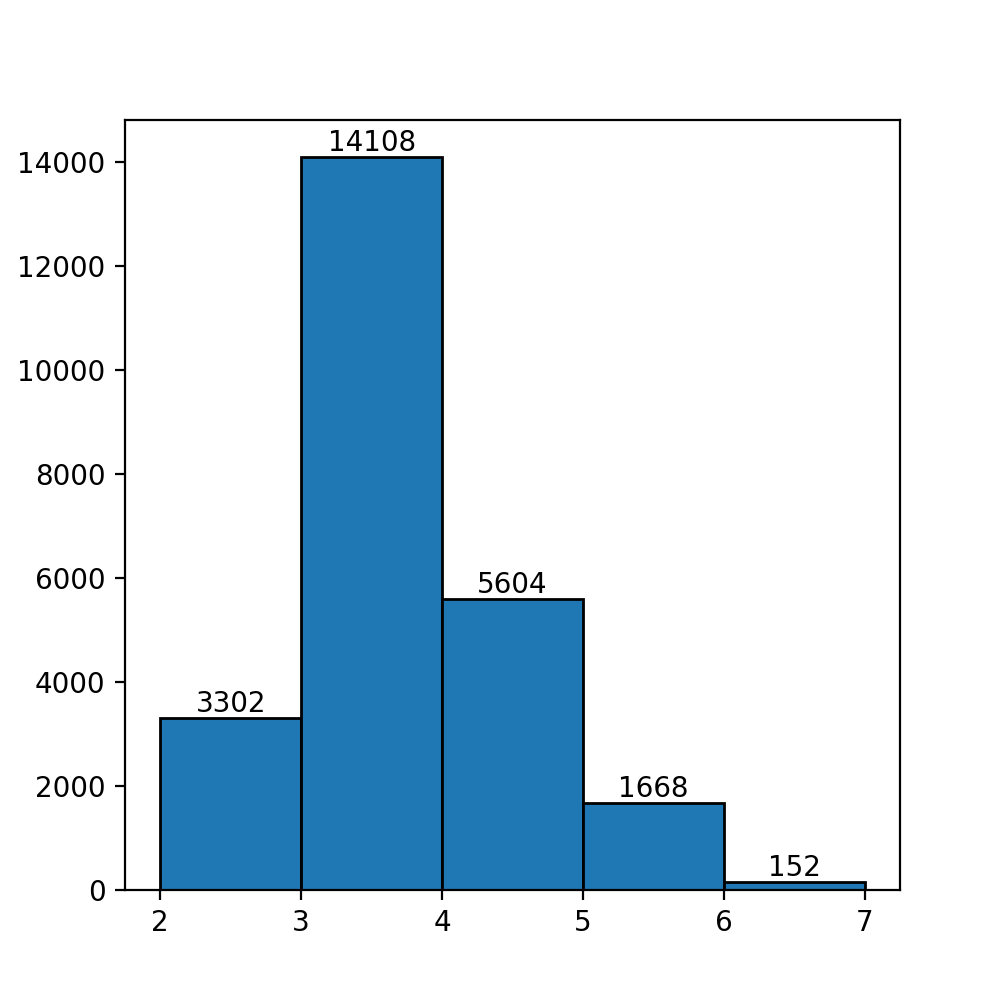

[Text(0, 0, '3302'),
 Text(0, 0, '14108'),
 Text(0, 0, '5604'),
 Text(0, 0, '1668'),
 Text(0, 0, '152')]

In [37]:
### Create a histogram displaying the distribution of runners
### by completion hours

# Get the data
url='https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz3_BostonMarathon2022.csv'
urllib.request.urlretrieve(url, './data/BostonMarathon.csv')

# Create a dataframe from the csv file
run = pd.read_csv('./data/BostonMarathon.csv')

# Reduce the dataframe to the column of interest
run_hour = run[['OfficialTime']].copy()
run_hour = run_hour.rename(columns={'OfficialTime':'CompletionTime'})

# Get the hour
run_hour['CompletionTime'] = run_hour['CompletionTime'].str[0].astype(int)

# Plot histogram
bins = range(run_hour['CompletionTime'].min(), run_hour['CompletionTime'].max()+1)

# Plot the histagram
fig, ax = plt.subplots(figsize=(5, 5))
counts, edges, bars = ax.hist(run_hour['CompletionTime'], bins = bins, edgecolor='black')
ax.bar_label(bars)

In [38]:
### Create an interactive line graph
### based on the data on the Boston Marathon 
### between 2017 - 2022

# Download the files
from pathlib import Path
import urllib.request

# Check if a data folder exists. If not, create it.
data_folder = Path('./data/')
data_folder.mkdir(exist_ok=True)

# Get the urls to the files and download the files
urls = ['https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz3_BostonMarathon2017.csv',
       'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz3_BostonMarathon2018.csv',
       'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz3_BostonMarathon2019.csv',
       'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz3_BostonMarathon2021.csv',
       'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz3_BostonMarathon2022.csv']
for url in urls:
    urllib.request.urlretrieve(url, './data/'+url.rsplit('/')[-1])
    
# Success message
print('Sample files ready.')

# Get the csv files
BosRun_2017 = pd.read_csv('./data/DataViz3_BostonMarathon2017.csv')
BosRun_2018 = pd.read_csv('./data/DataViz3_BostonMarathon2018.csv')
BosRun_2019 = pd.read_csv('./data/DataViz3_BostonMarathon2019.csv')
BosRun_2021 = pd.read_csv('./data/DataViz3_BostonMarathon2021.csv')
BosRun_2022 = pd.read_csv('./data/DataViz3_BostonMarathon2022.csv')

# reduce the columns to columns of interest
BosRun_2017 = BosRun_2017[['CountryOfResName', 'Gender']]
BosRun_2018 = BosRun_2018[['CountryOfResName', 'Gender']]
BosRun_2019 = BosRun_2019[['CountryOfResName', 'Gender']]
BosRun_2021 = BosRun_2021[['CountryOfResName', 'Gender']]
BosRun_2022 = BosRun_2022[['CountryOfResName', 'Gender']]

# Get the count of female and male runners for each year's dataframe
BosRun_2017 = BosRun_2017.groupby(['CountryOfResName', 'Gender']).size().to_frame('Count').stack().unstack(level=1)
BosRun_2017 = BosRun_2017.rename_axis(None, axis=1).reset_index().drop('level_1', axis=1).fillna(0)
BosRun_2018 = BosRun_2018.groupby(['CountryOfResName', 'Gender']).size().to_frame('Count').stack().unstack(level=1)
BosRun_2018 = BosRun_2018.rename_axis(None, axis=1).reset_index().drop('level_1', axis=1).fillna(0)
BosRun_2019 = BosRun_2019.groupby(['CountryOfResName', 'Gender']).size().to_frame('Count').stack().unstack(level=1)
BosRun_2019 = BosRun_2019.rename_axis(None, axis=1).reset_index().drop('level_1', axis=1).fillna(0)
BosRun_2021 = BosRun_2021.groupby(['CountryOfResName', 'Gender']).size().to_frame('Count').stack().unstack(level=1)
BosRun_2021 = BosRun_2021.rename_axis(None, axis=1).reset_index().drop('level_1', axis=1).fillna(0)
BosRun_2022 = BosRun_2022.groupby(['CountryOfResName', 'Gender']).size().to_frame('Count').stack().unstack(level=1)
BosRun_2022 = BosRun_2022.rename_axis(None, axis=1).reset_index().drop('level_1', axis=1).fillna(0)

# Add a new column to store the year of the race
BosRun_2017['Year'] = 2017
BosRun_2018['Year'] = 2018
BosRun_2019['Year'] = 2019
BosRun_2021['Year'] = 2021
BosRun_2022['Year'] = 2022

# Get all Country Res Names and make a dataframe
country_res_all = pd.DataFrame({'CountryOfResName':
                               list(set(BosRun_2017['CountryOfResName'].tolist() +
                                   BosRun_2018['CountryOfResName'].tolist() +
                                   BosRun_2019['CountryOfResName'].tolist() +
                                   BosRun_2021['CountryOfResName'].tolist() +
                                   BosRun_2022['CountryOfResName'].tolist()
                                  ))}).sort_values(by='CountryOfResName').reset_index(drop=True)

# Make df from each year a full df with all country names
# fill the missing values with relevant values
BosRun_2017 = pd.merge(BosRun_2017, country_res_all, how='right').fillna(value={'F':0, 'M':0, 'Year':2017})
BosRun_2018 = pd.merge(BosRun_2018, country_res_all, how='right').fillna(value={'F':0, 'M':0, 'Year':2018})
BosRun_2019 = pd.merge(BosRun_2019, country_res_all, how='right').fillna(value={'F':0, 'M':0, 'Year':2019})
BosRun_2021 = pd.merge(BosRun_2021, country_res_all, how='right').fillna(value={'F':0, 'M':0, 'Year':2021})
BosRun_2022 = pd.merge(BosRun_2022, country_res_all, how='right').fillna(value={'F':0, 'M':0, 'Year':2022})

# Concatenate the dfs into one single df
BosRun_all = pd.concat([BosRun_2017, BosRun_2018, BosRun_2019, BosRun_2021, BosRun_2022])

# Drop rows where the CountryOfResName has a null value
BosRun_all = BosRun_all.dropna(subset='CountryOfResName')

# Make two bounded text box for year range selection 
start_year = widgets.BoundedFloatText(
    value=BosRun_all['Year'].min(),
    min=BosRun_all['Year'].min(),
    max=BosRun_all['Year'].max(),
    step=1,
    description='Start Year:',
    disabled=False,
    color='black'
)
end_year = widgets.BoundedFloatText(
    value=BosRun_all['Year'].max(),
    min=BosRun_all['Year'].min(),
    max=BosRun_all['Year'].max(),
    step=1,
    description='End Year:',
    disabled=False,
    color='black'
)

# make dropdown menu for country selection 
country_res = widgets.Dropdown(
                                options=['All'] + BosRun_all['CountryOfResName'].unique().tolist(),                            
                                value='All',
                                description='Country:',
                        )

# Define a function to plot the interactive figure
def plot(start_year, end_year, country_res):
    """
    Filter and plot the dataframe as a line graph of count of F and M runners over the
    selected year range
    """
    if start_year >= end_year:
        print("Start year must preceed end year.")        
    else:
        df = BosRun_all.copy()
        df = df.loc[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
        x = list(range(int(start_year), int(end_year+1)))
        if 2020 in x:
            x.remove(2020)
        if country_res != 'All':
            df = df.loc[df['CountryOfResName']==country_res]
        # Plot the graph

        if df['F'].sum() + df['M'].sum() == 0:
            print('There is no data in the selection to plot.')
        else:
            y_female = df[['F', 'M', 'Year']].groupby(by='Year').sum()['F']
            y_male = df[['F', 'M', 'Year']].groupby(by='Year').sum()['M']
            fig, ax = plt.subplots()
            ax.plot(x, y_female, 'o-', color='orchid', label='F')
            ax.plot(x, y_male, 'D-', color='blue', label='M')
            ax.set_xticks(x)
            ax.legend(loc='lower left')
            ax.set_title(f"Country of residence = {country_res}")
interactive(plot, country_res=country_res, start_year=start_year, end_year=end_year)

Sample files ready.


interactive(children=(BoundedFloatText(value=2017.0, description='Start Year:', max=2022.0, min=2017.0, step=1…